In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,root_mean_squared_error, r2_score , classification_report,mean_absolute_error# Regression
from sklearn.metrics import top_k_accuracy_score, precision_score,confusion_matrix, recall_score, f1_score, roc_auc_score ,confusion_matrix # Classification

import pickle


In [4]:
# Reading csv file and converting into dataframe
df = pd.read_csv('C:/Users/Admin/Downloads/Copper_Set.xlsx - Result 1.csv')
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [5]:
# verify the number of unique values

for i in df.columns:
    print(f'{i}:{df[i].nunique()}')

id:181671
item_date:252
quantity tons:181673
customer:1169
country:17
status:9
item type:7
application:30
thickness:594
width:1386
material_ref:16563
product_ref:33
delivery date:28
selling_price:9795


In [6]:
# checking null values and missing values
df.shape
missing_values = df.isnull().sum()
print(missing_values)

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [8]:
# Alinging the data in same format

df['item_date'] = pd.to_datetime(df['item_date'],format = '%Y%m%d',errors='coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

In [9]:
missing_values = df.isnull().sum()
print(missing_values)
df.shape

id                   2
item_date            3
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
dtype: int64


(181673, 14)

In [10]:

# material ref have more than 55% are null values and id have all are unique values. so we have drop both columns.

df.drop(columns=['id','material_ref'], inplace=True)
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-03-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,2020-07-01,591.00
181669,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,2020-07-01,589.00
181670,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,2020-07-01,619.00
181671,2020-07-02,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,2020-07-01,601.00


In [11]:

# quantity and selling price values are not below 0. so we convert to null for below 0 values.

df['quantity tons'] = df['quantity tons'].apply(lambda x: np.nan if x<=0 else x)
df['selling_price'] = df['selling_price'].apply(lambda x: np.nan if x<=0 else x)

In [12]:
missing_values = df.isnull().sum()
print(missing_values)
print(df.shape)

item_date         3
quantity tons     5
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
delivery date     3
selling_price     8
dtype: int64
(181673, 12)


In [13]:
# there are less number of null values so we can drop null values

df.dropna(inplace=True)
missing_values = df.isnull().sum()
print(missing_values)

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64


In [14]:
df['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [15]:
df['item type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [16]:
# convert categorical data into numerical using map and ordinal methods
df['status'] = df['status'].map({'Lost':0, 'Won':1, 'Draft':2, 'To be approved':3, 'Not lost for AM':4,
                                 'Wonderful':5, 'Revised':6, 'Offered':7, 'Offerable':8})
df['item type'] = OrdinalEncoder().fit_transform(df[['item type']])
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,2021-01-01,644.33
3,2021-04-01,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,2021-01-01,768.00
4,2021-04-01,785.526262,30211560.0,28.0,1,5.0,10.0,4.00,2000.0,640665,2021-03-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...
181667,2020-07-02,106.783299,30200854.0,25.0,1,5.0,41.0,0.96,1240.0,164141591,2020-07-01,602.00
181668,2020-07-02,102.482422,30200854.0,25.0,1,5.0,41.0,0.96,1220.0,164141591,2020-07-01,591.00
181669,2020-07-02,208.086469,30200854.0,25.0,1,5.0,41.0,0.95,1500.0,164141591,2020-07-01,589.00
181670,2020-07-02,4.235594,30200854.0,25.0,1,5.0,41.0,0.71,1250.0,164141591,2020-07-01,619.00


In [17]:
# final verification of null values after encoding
df.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,181622.0,5.876532e+03,2.349405e+06,0.00001,1.096878e+01,3.036402e+01,6.716208e+01,1.000000e+09
customer,181622.0,3.023251e+07,1.005646e+05,12458.00000,3.019688e+07,3.020524e+07,3.028042e+07,3.040818e+07
country,181622.0,4.489382e+01,2.440448e+01,25.00000,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,181622.0,1.316564e+00,1.330333e+00,0.00000,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
item type,181622.0,4.133205e+00,1.055218e+00,0.00000,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
application,181622.0,2.561567e+01,1.775397e+01,2.00000,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181622.0,2.550493e+00,2.976505e+00,0.18000,7.000000e-01,1.500000e+00,3.000000e+00,4.000000e+02
width,181622.0,1.295266e+03,2.616515e+02,1.00000,1.179000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181622.0,4.740152e+08,7.175336e+08,611728.00000,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
selling_price,181622.0,1.918476e+03,3.318413e+05,0.10000,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


# Skewness handling 

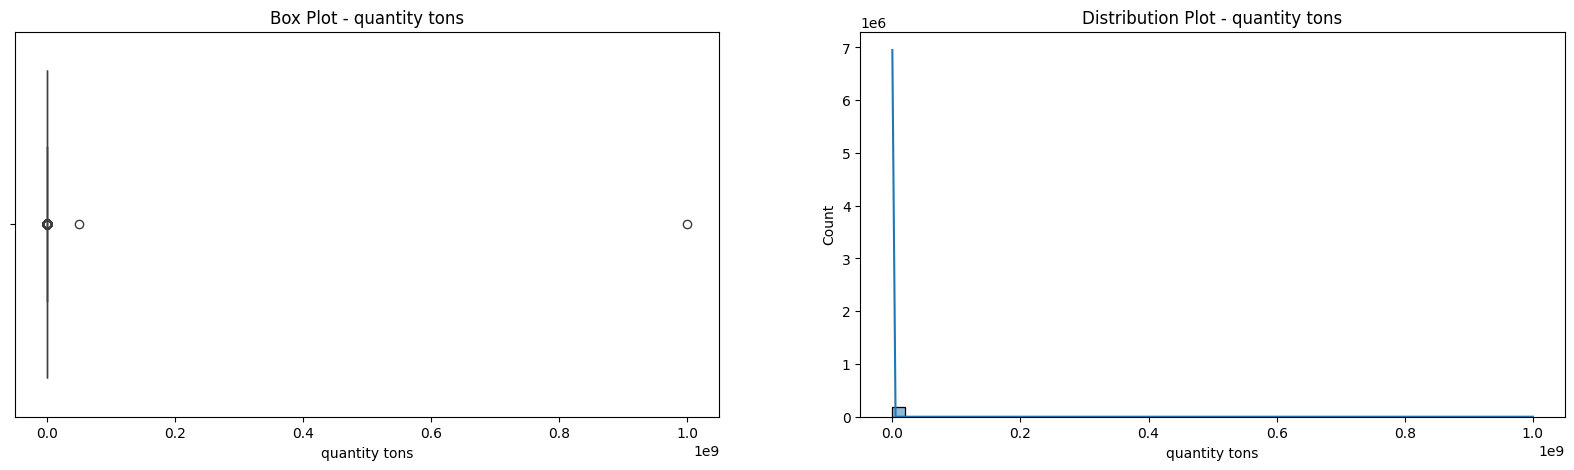

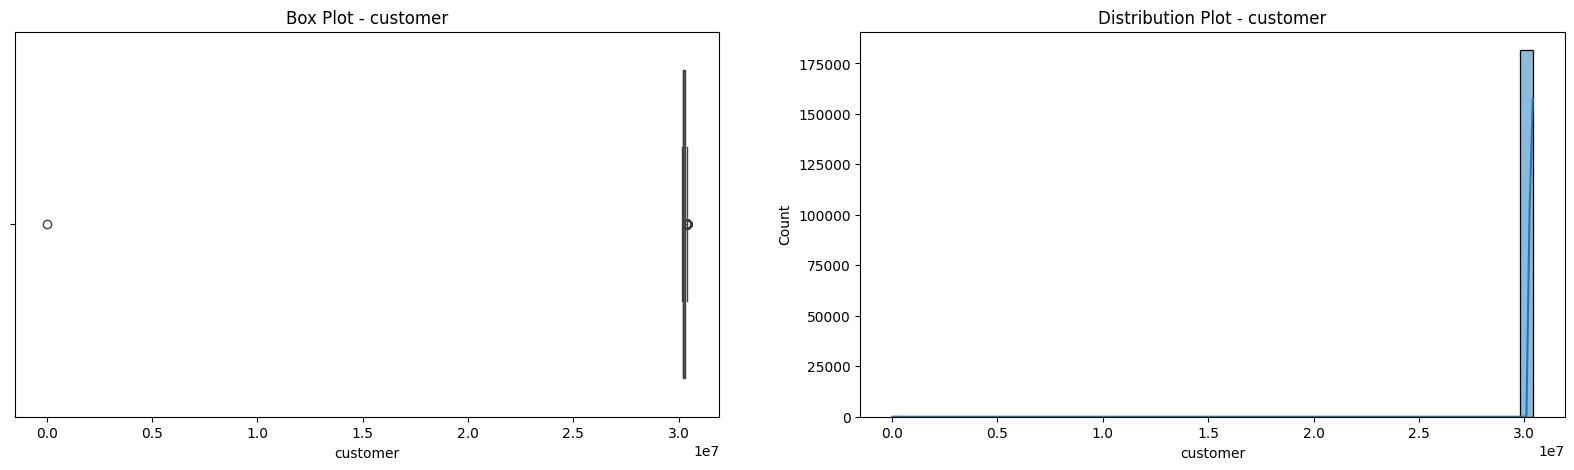

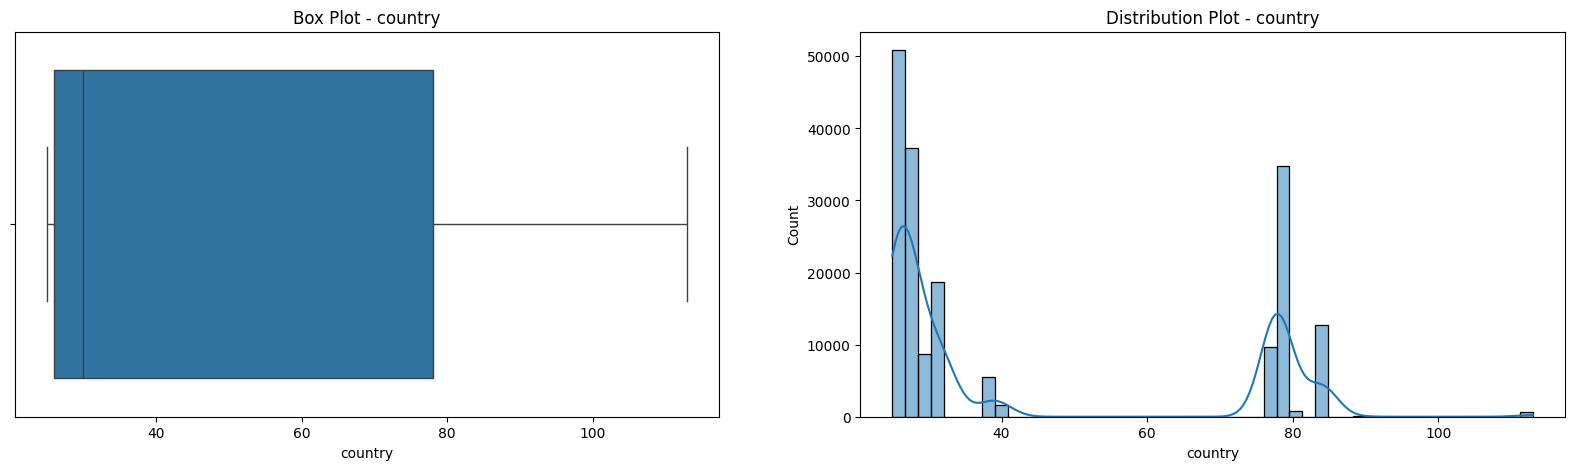

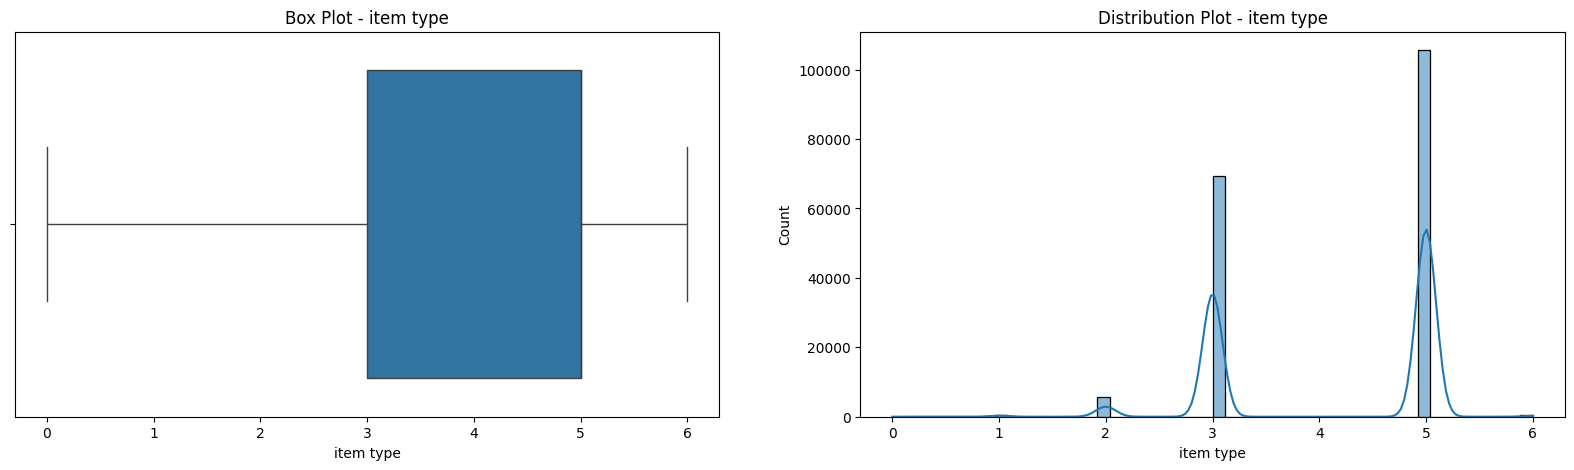

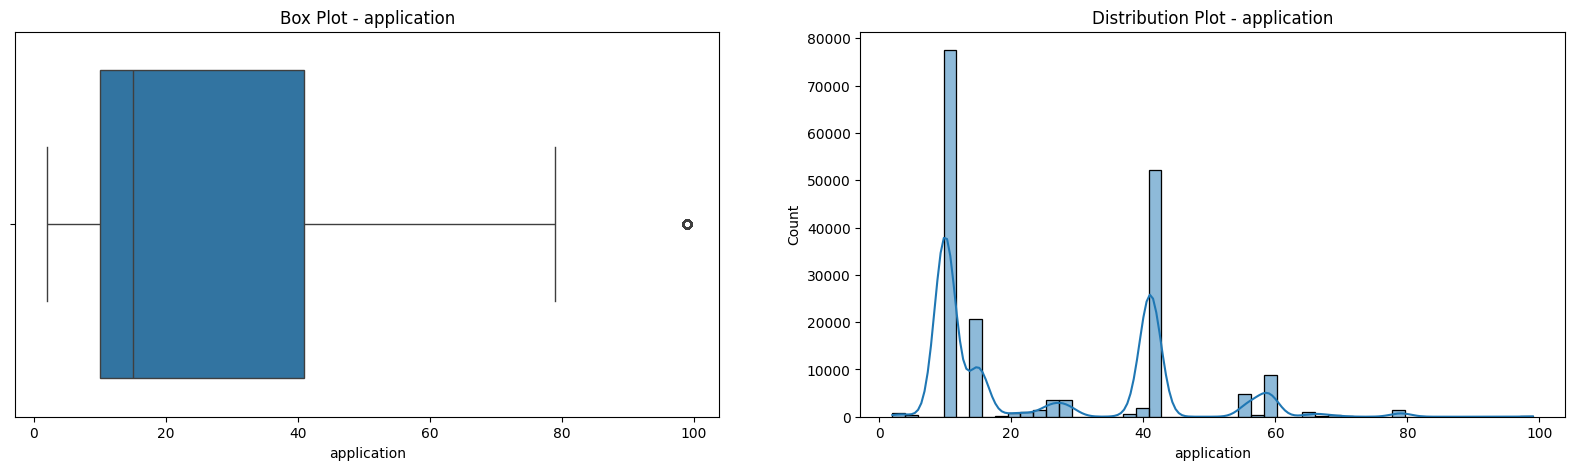

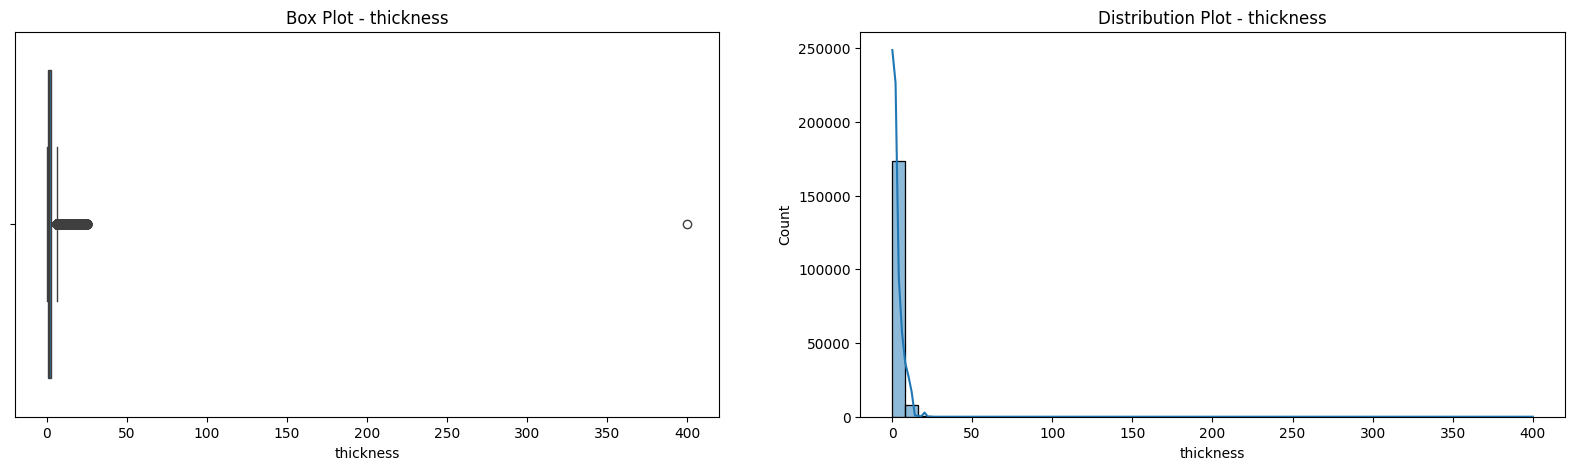

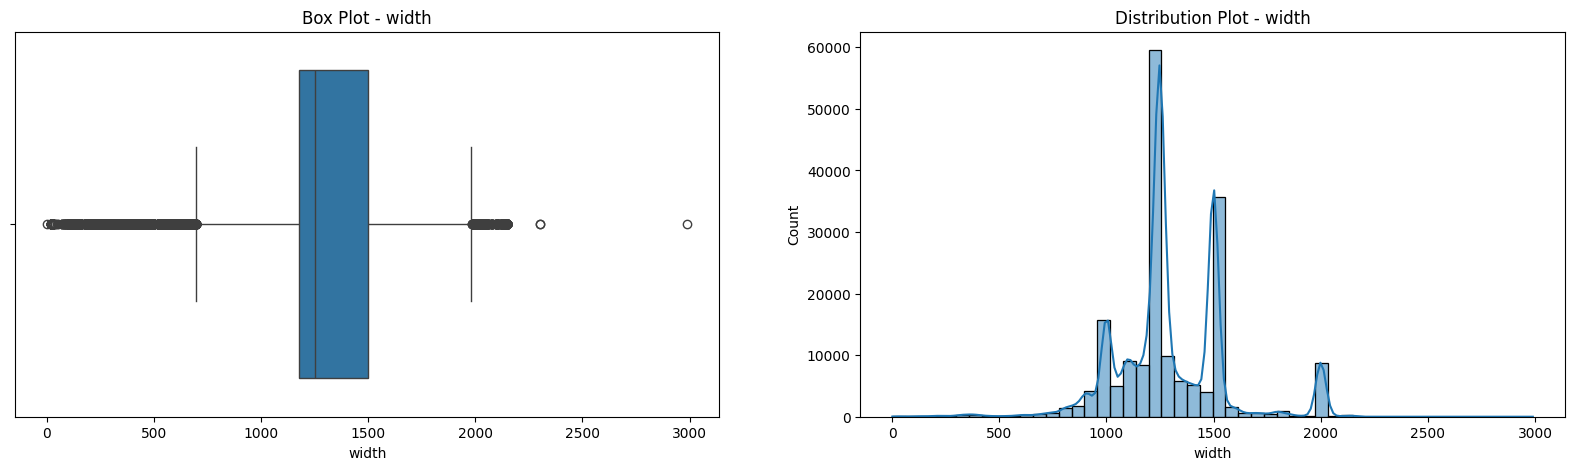

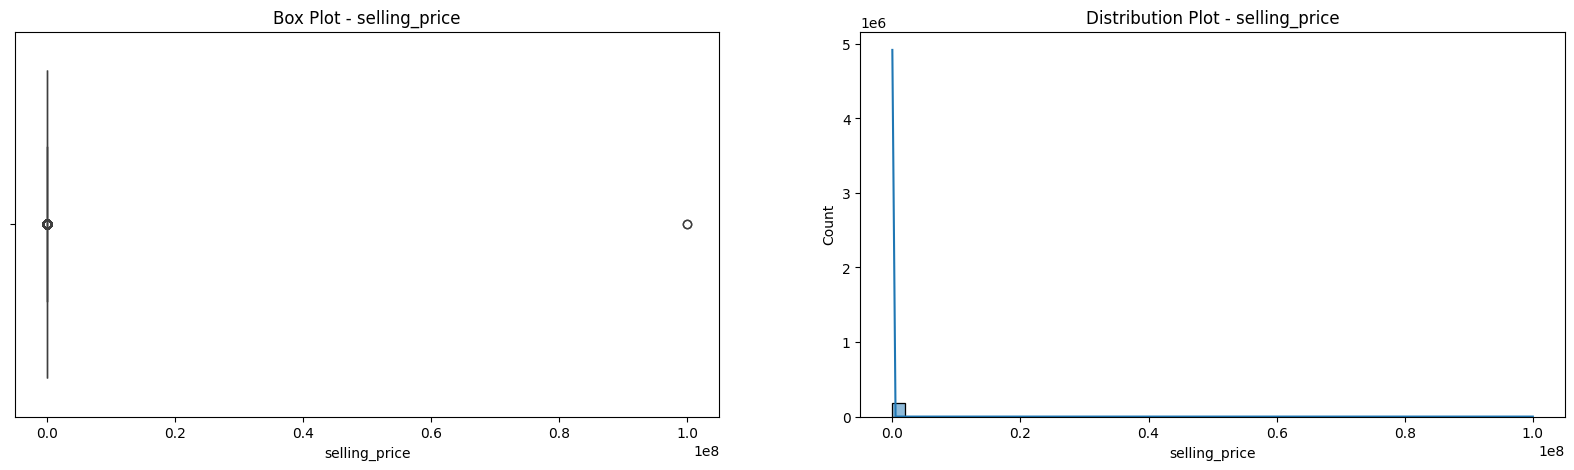

In [19]:
# Plot data to check the outliers using boxplot and histplot

columns = ['quantity tons', 'customer', 'country', 'item type', 'application', 'thickness', 'width', 'selling_price']

def plot(df,column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    sns.boxplot(data=df,x=column)
    plt.title(f'Box Plot - {column}')

    plt.subplot(1,2,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot - {column}')

for i in columns:
    plot(df, i)

In [27]:
# Outliers
 
# df['quantity tons']
# df['thickness']
# df['selling_price']

In [20]:
# Applying log transformation method 
df1 = df.copy()
df1['quantity tons'] = np.log(df1['quantity tons'])
df1['selling_price'] = np.log(df1['selling_price'])
df1['thickness'] = np.log(df1['thickness'])

df1.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,3.991779,30156308.0,28.0,1,5.0,10.0,0.693147,1500.0,1670798778,2021-07-01,6.749931
1,2021-04-01,6.643822,30202938.0,25.0,1,5.0,41.0,-0.223144,1210.0,1668701718,2021-04-01,6.953684
2,2021-04-01,5.956169,30153963.0,30.0,1,6.0,28.0,-0.967584,952.0,628377,2021-01-01,6.468211
3,2021-04-01,5.310301,30349574.0,32.0,1,3.0,59.0,0.832909,1317.0,1668701718,2021-01-01,6.643790
4,2021-04-01,6.666354,30211560.0,28.0,1,5.0,10.0,1.386294,2000.0,640665,2021-03-01,6.357842


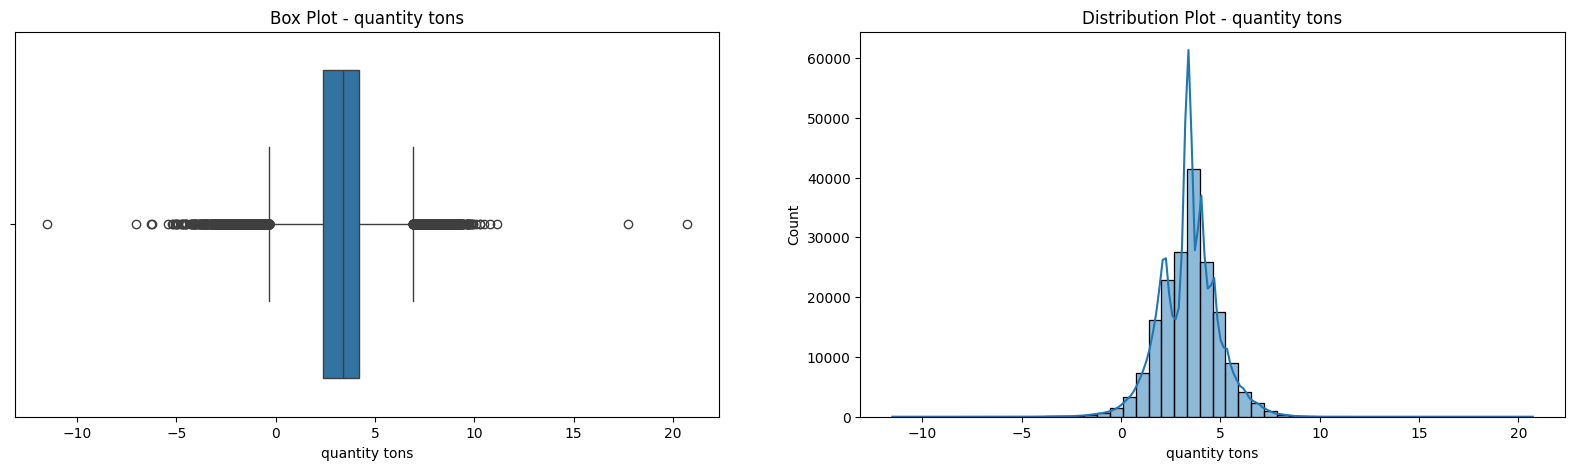

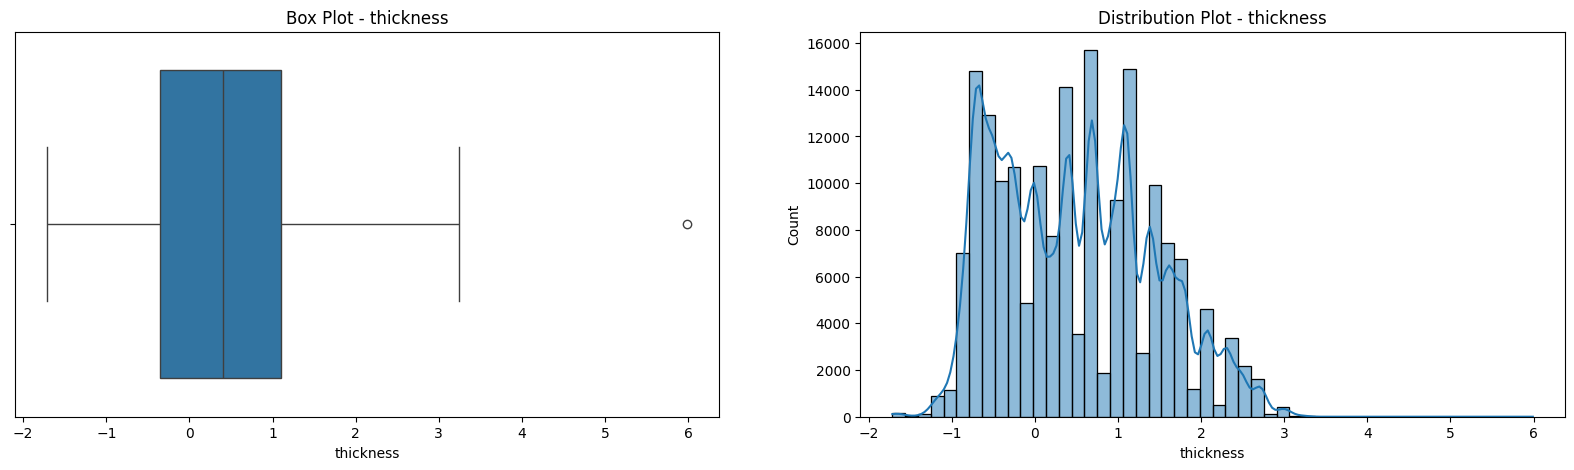

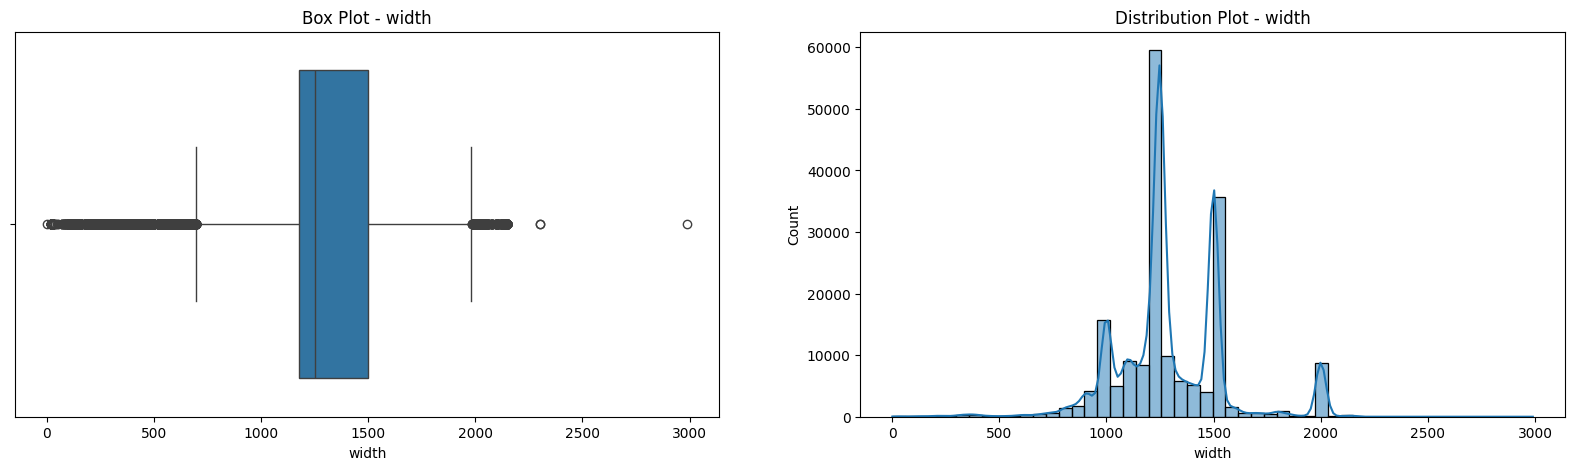

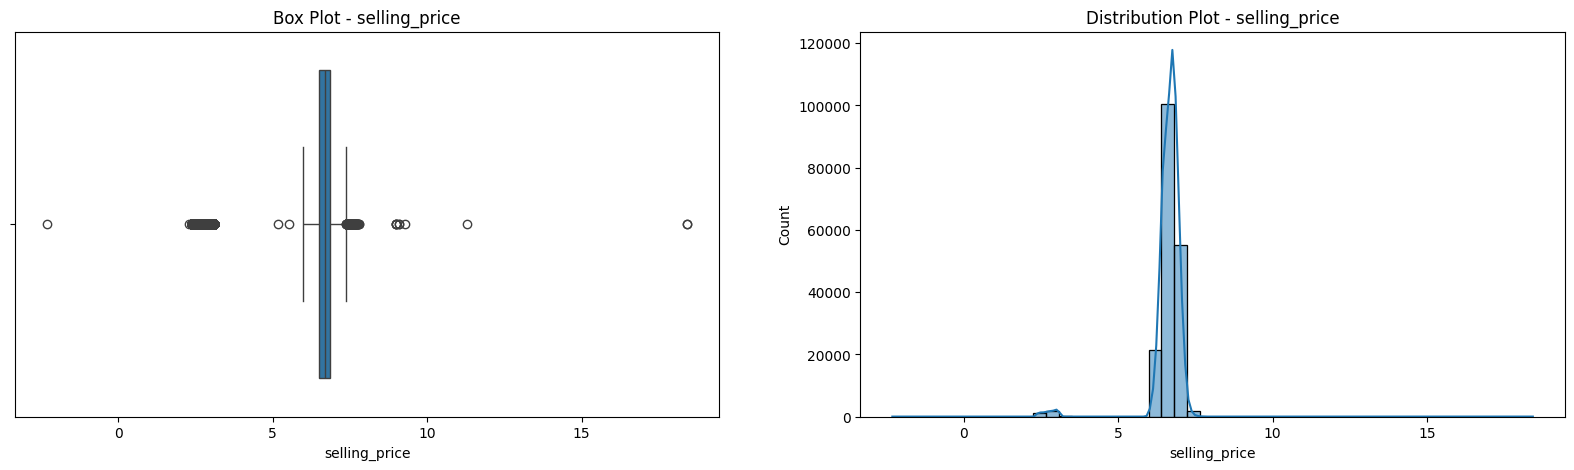

In [21]:
# Plot data after applying log 

for i in ['quantity tons', 'thickness', 'width', 'selling_price']:
    plot(df1, i)

# Handling Outliers - using Interquartile Range (IQR) method

In [22]:
# Using IQR and clip() methods to handle the outliers and add a new column of dataframe

df2 = df1.copy()

def removing_outlier(df2, column):
    iqr = df2[column].quantile(0.75) - df2[column].quantile(0.25)
    upper_threshold = df2[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df2[column].quantile(0.25) - (1.5*iqr)
    df2[column] = df2[column].clip(lower_threshold, upper_threshold)
     

# (Ex: lower threshold = 5 and upper threshold = 20)
# above upper threshold values (>20) are converted to upper threshold value (20) in features
# below lower threshold values (<5)  are converted to lower threshold value (5)  in features

removing_outlier(df2, 'quantity tons')
removing_outlier(df2, 'thickness')
removing_outlier(df2, 'selling_price')
removing_outlier(df2, 'width')


In [23]:
df2.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price'],
      dtype='object')

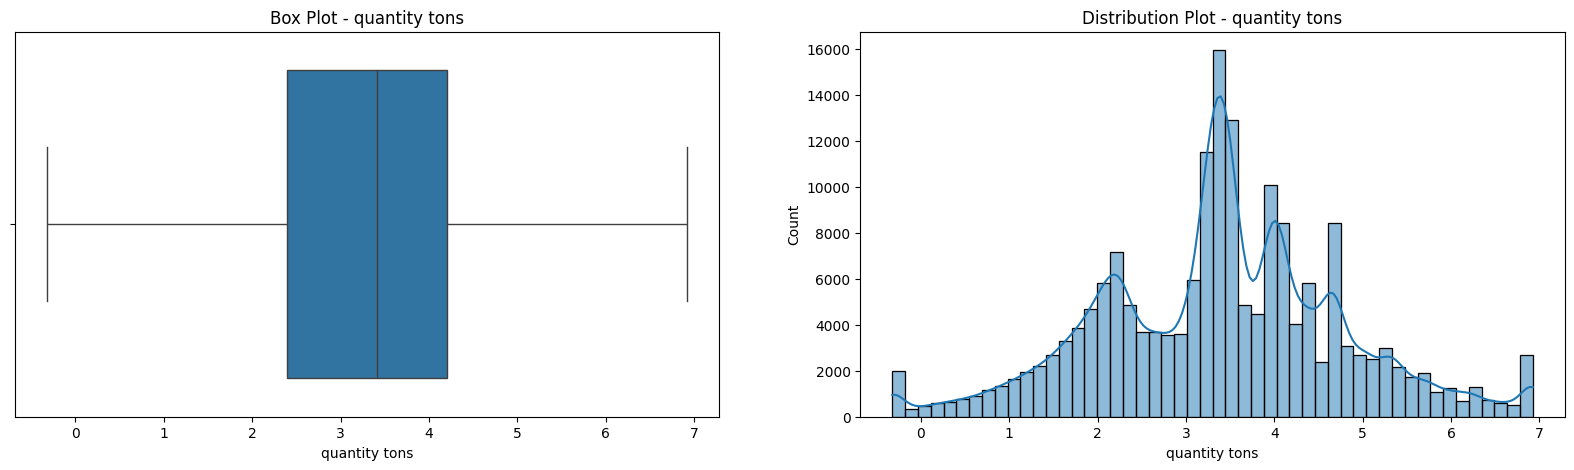

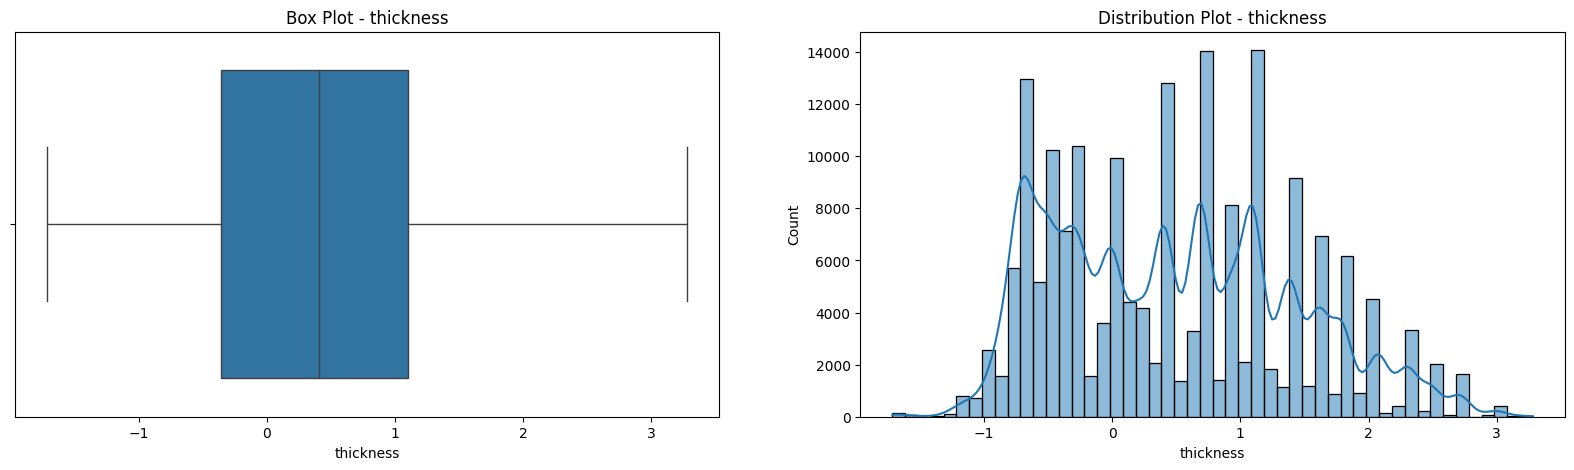

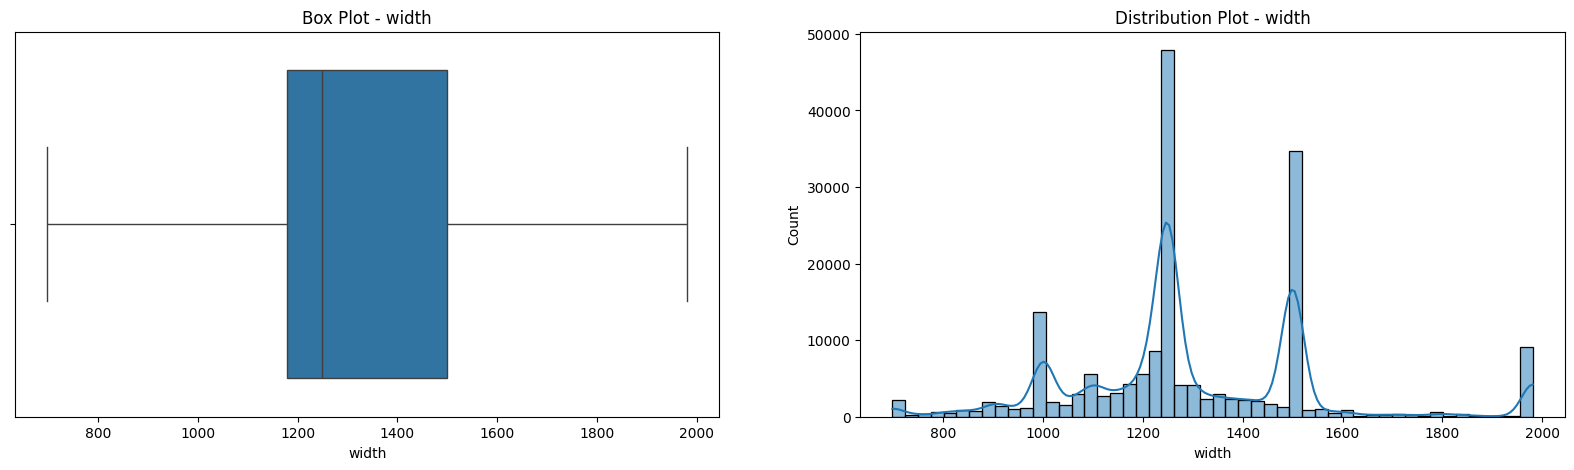

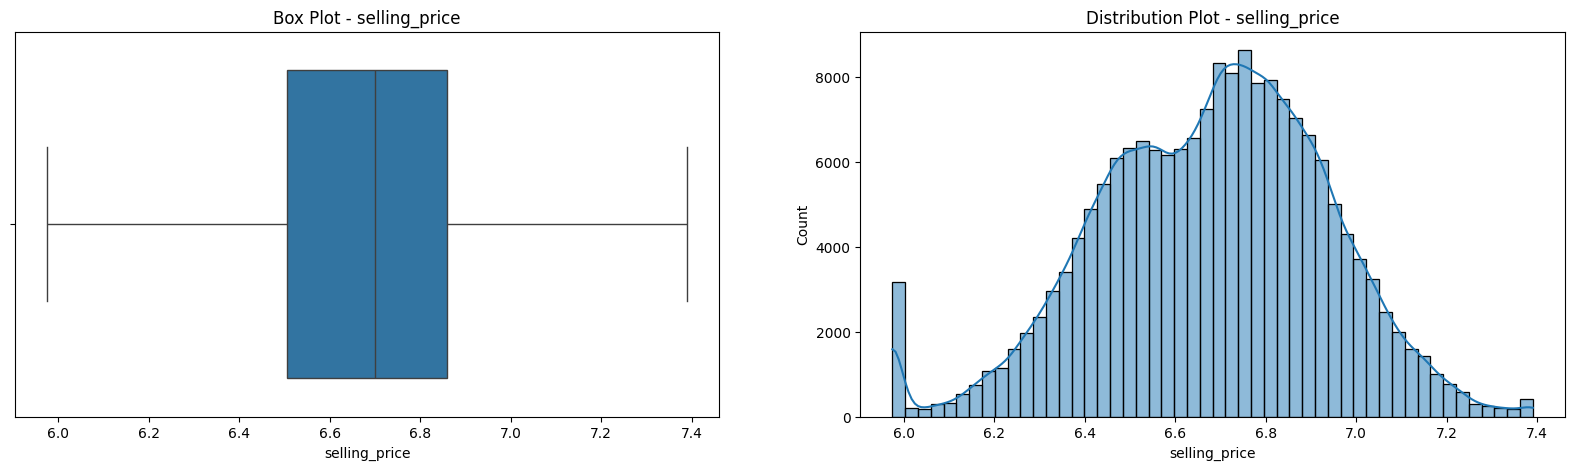

In [24]:
# Plot data after removing the outliers

columns = ['quantity tons', 'thickness', 'width', 'selling_price']

for i in columns:
    plot(df2,i)

<Axes: >

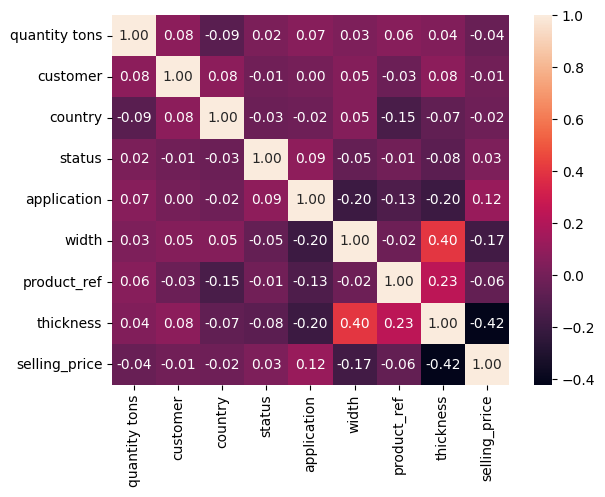

In [25]:
# Need to verify any columns are highly correlated using Heatmap. If any columns correalaion value >= 0.7 (absolute value), drop the columns.

cols = ['quantity tons','customer','country','status','application','width','product_ref','thickness','selling_price']
df_heatmap = df2[cols].corr()
sns.heatmap(df_heatmap, annot=True, fmt= '.2f')

# Regression Model Building

In [26]:
df_final = df2.copy()

In [27]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

import pickle

In [28]:
from sklearn.metrics import r2_score

def machine_learning_regression(df, algorithm):

    x = df.drop(columns=["selling_price", 'item_date', 'delivery date'], axis=1)
    y = df["selling_price"]
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

    model = algorithm().fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    accuracy_metrics = {'algorithm': algorithm.__name__,
                        'R2_train' : r2_train,
                        'R2_test'  : r2_test}

    return accuracy_metrics

In [29]:
print(machine_learning_regression(df_final, DecisionTreeRegressor))
print(machine_learning_regression(df_final, ExtraTreesRegressor))
print(machine_learning_regression(df_final, RandomForestRegressor))
print(machine_learning_regression(df_final, AdaBoostRegressor))
print(machine_learning_regression(df_final, GradientBoostingRegressor))



{'algorithm': 'DecisionTreeRegressor', 'R2_train': 0.9977462221814026, 'R2_test': 0.5014630869636707}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 0.9977462221814026, 'R2_test': 0.6507415899245549}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9569909335391443, 'R2_test': 0.705209816912263}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.3904984301309383, 'R2_test': 0.3880675021684782}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.5178243894425998, 'R2_test': 0.5175961901655617}


In [58]:
# RandomForestRegressor gives best r2 score so i choose this model  
# Using GridSearchCV to find the best parameters for the model

In [71]:
from sklearn.model_selection import GridSearchCV


x = df_final.drop(columns=["selling_price", 'item_date', 'delivery date'], axis=1)
y = df_final["selling_price"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

param_grid_r = {'max_depth'      : [5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf' : [1, 2, 4],
              'max_features'     : ['sqrt', 'log2', None]}

grid_search_r = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid_r, cv=5, n_jobs=-1)
grid_search_r.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [72]:
grid_search_r.best_params_,grid_search_r.best_score_


({'max_depth': 20,
  'max_features': None,
  'min_samples_leaf': 1,
  'min_samples_split': 5},
 np.float64(0.7080164278494457))

In [32]:
# Applying RandomForestRegressor model

x = df_final.drop(columns=["selling_price", 'item_date', 'delivery date'], axis=1)
y = df_final["selling_price"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=5).fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train, r2_test
     

(0.859301558489996, 0.7181980655319664)

In [43]:
model = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=5).fit(x_train, y_train)
y_pred = model.predict(x_test)


rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


metrics = {'R2': r2,
           
           'Root Mean Squared Error': rmse}

metrics

{'R2': 0.7190720989053418,
 'Root Mean Squared Error': np.float64(0.13550365577438697)}

In [36]:
x.head(5)


,quantity tons,customer,country,status,item type,application,thickness,width,product_ref
0,3.991779,30156308.0,28.0,1,5.0,10.0,0.693147,1500.0,1670798778
1,6.643822,30202938.0,25.0,1,5.0,41.0,-0.223144,1210.0,1668701718
2,5.956169,30153963.0,30.0,1,6.0,28.0,-0.967584,952.0,628377
3,5.310301,30349574.0,32.0,1,3.0,59.0,0.832909,1317.0,1668701718
4,6.666354,30211560.0,28.0,1,5.0,10.0,1.386294,1981.5,640665


In [48]:
# manually passing the user input and predict the selling price

user_data = np.array([[6.64,30202938,25,1,5,41,-0.22,1210,1668701718]])
y_pred = model.predict(user_data)
y_pred[0]

np.float64(6.902862442834703)

In [49]:
# using Inverse Log Transformation to convert the value to original scale of the data (exp)
np.exp(y_pred[0])

np.float64(995.119114276915)

In [44]:
# save model using pickle

with open('regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [45]:
# load the pickle model to predict selling price

with open('D:/Data science projects/Industrial copper modeling/regression_model.pkl', 'rb') as f:
    model = pickle.load(f)

    

In [46]:
x.head(3)

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref
0,3.991779,30156308.0,28.0,1,5.0,10.0,0.693147,1500.0,1670798778
1,6.643822,30202938.0,25.0,1,5.0,41.0,-0.223144,1210.0,1668701718
2,5.956169,30153963.0,30.0,1,6.0,28.0,-0.967584,952.0,628377


In [47]:
# predict the price using saved model
y_pred = model.predict(np.array([[6.64,30202938,25,1,5,41,-0.22,1210,1668701718]]))
np.exp(y_pred[0])

np.float64(995.119114276915)

Classification Model Building

In [50]:

from imblearn.combine import SMOTETomek
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import pickle

In [51]:
df_status_pred = df_final.copy()
df_status_pred.head(3)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,3.991779,30156308.0,28.0,1,5.0,10.0,0.693147,1500.0,1670798778,2021-07-01,6.749931
1,2021-04-01,6.643822,30202938.0,25.0,1,5.0,41.0,-0.223144,1210.0,1668701718,2021-04-01,6.953684
2,2021-04-01,5.956169,30153963.0,30.0,1,6.0,28.0,-0.967584,952.0,628377,2021-01-01,6.468211


In [52]:
# filter the status column values only 1 & 0 rows in a new dataframe ['Won':1 & 'Lost':0]
df_status_pred = df_status_pred[(df_status_pred.status == 1) | (df_status_pred.status == 0)]


In [53]:
df_status_pred.shape


(150428, 12)

In [54]:
df_status_pred.status.value_counts()


status
1    115997
0     34431
Name: count, dtype: int64

In [55]:
# in status feature, the 'Won' and 'Lost' value difference is very high. So we need to oversampling to reduce the difference

x = df_status_pred.drop(["status",'item_date', 'delivery date'],axis=1)
y = df_status_pred['status']

x_new, y_new = SMOTETomek().fit_resample(x,y)
     

In [57]:
print(x.shape,y.shape)
print(x_new.shape,y_new.shape)

(150428, 9) (150428,)
(225788, 9) (225788,)


In [58]:
# check the accuracy of training and testing using metrics

def machine_learning_classification(x_new,y_new, algorithm):

    x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=42)
    model = algorithm().fit(x_train, y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
    accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

    accuracy_metrics = {'algorithm'    : algorithm.__name__,
                        'accuracy_train': accuracy_train,
                        'accuracy_test' : accuracy_test}

    return accuracy_metrics

In [59]:
print(machine_learning_classification(x_new, y_new, DecisionTreeClassifier))
print(machine_learning_classification(x_new, y_new, ExtraTreesClassifier))
print(machine_learning_classification(x_new, y_new, RandomForestClassifier))
print(machine_learning_classification(x_new, y_new, AdaBoostClassifier))
print(machine_learning_classification(x_new, y_new, GradientBoostingClassifier))


{'algorithm': 'DecisionTreeClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.9417600425173834}
{'algorithm': 'ExtraTreesClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.9706585765534346}
{'algorithm': 'RandomForestClassifier', 'accuracy_train': 0.9999944638210707, 'accuracy_test': 0.9672926170335268}
{'algorithm': 'AdaBoostClassifier', 'accuracy_train': 0.7574212478547306, 'accuracy_test': 0.7590238717392267}
{'algorithm': 'GradientBoostingClassifier', 'accuracy_train': 0.7906549299673366, 'accuracy_test': 0.7913105097657115}


In [60]:
# Both RandomForestClassifier and ExtraTreesClassifier have good accuracy scores
# I chosse RandomForestClassifier

In [61]:
# GridsearchCV is a cross validation function.

# Hyper parameter tuning - we give parameter values manually in the algorithm to reduce the overfitting issue and get better accuracy.

# so using gridserachcv method - to pass the mulitiple values in each parameters and it try to evaluate all the combination of values and
# finally return the best accuracy parameter values based on the score.

In [62]:
# passing the same parameters which is used in regression and check the accuracy for training and testing

x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=42)

model = RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
accuracy_train, accuracy_test

(0.9822177932790788, 0.9574604721201116)

In [63]:
# predict the status and check the accuracy using metrics

x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=42)

model = RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred = model.predict(x_test)

print(confusion_matrix(y_true=y_test, y_pred=y_pred))
print(classification_report(y_true=y_test, y_pred=y_pred))

[[22188   468]
 [ 1520 20982]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     22656
           1       0.98      0.93      0.95     22502

    accuracy                           0.96     45158
   macro avg       0.96      0.96      0.96     45158
weighted avg       0.96      0.96      0.96     45158



In [65]:
# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)

FP,TP,threshold = roc_curve(y_true=y_test, y_score=y_pred)
auc_curve = auc(x=FP, y=TP)
print(auc_curve)

0.955896834593987


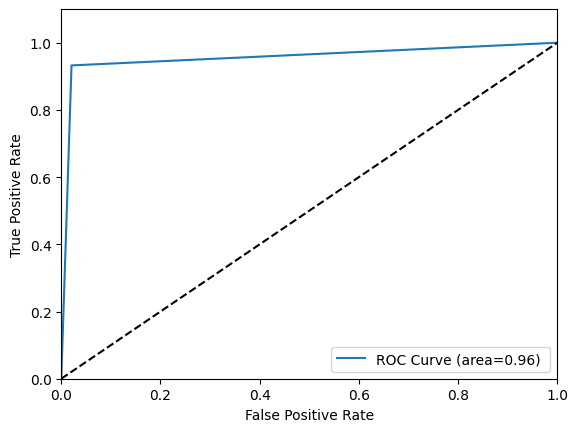

In [66]:
plt.plot(FP, TP, label=f"ROC Curve (area={round(auc_curve, 2)}) ")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [64]:
# feature importance

importances = model.feature_importances_
feature_names = x_new.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


         Feature  Importance
1       customer    0.186029
3      item type    0.141054
0  quantity tons    0.140246
2        country    0.120062
8  selling_price    0.118686
4    application    0.106406
5      thickness    0.081282
7    product_ref    0.058169
6          width    0.048065


In [67]:
x_new.head(3)

,quantity tons,customer,country,item type,application,thickness,width,product_ref,selling_price
0,3.991779,30156308.0,28.0,5.0,10.0,0.693147,1500.0,1670798778,6.749931
1,6.643822,30202938.0,25.0,5.0,41.0,-0.223144,1210.0,1668701718,6.953684
2,5.956169,30153963.0,30.0,6.0,28.0,-0.967584,952.0,628377,6.468211


In [69]:
# pass the user data manually to check the prediction of status of model

user_data = np.array([[5.95,30153963, 30, 6, 28,-0.96,952,628377,6.46]])
y_p = model.predict(user_data)
if y_p[0] == 1:
    print('Won')
else:
    print('Lose')
     

Won


In [70]:
user_data = np.array([[2.2,30223403, 78, 5, 10,0, 1500, 1668701718, 7.13]])
y_p = model.predict(user_data)
if y_p[0] == 1:
    print('Won')
else:
    print('Lose')
     


Lose


In [71]:
# save our model using pickle

with open('classification_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [72]:
x_new.head(5)

,quantity tons,customer,country,item type,application,thickness,width,product_ref,selling_price
0,3.991779,30156308.0,28.0,5.0,10.0,0.693147,1500.0,1670798778,6.749931
1,6.643822,30202938.0,25.0,5.0,41.0,-0.223144,1210.0,1668701718,6.953684
2,5.956169,30153963.0,30.0,6.0,28.0,-0.967584,952.0,628377,6.468211
3,5.310301,30349574.0,32.0,3.0,59.0,0.832909,1317.0,1668701718,6.643790
4,6.666354,30211560.0,28.0,5.0,10.0,1.386294,1981.5,640665,6.357842


In [74]:
# predict the status with saved model

with open('D:/Data science projects/Industrial copper modeling/classification_model.pkl', 'rb') as f:
    model = pickle.load(f)

user_data = np.array([[6.66,30211560,28,5,10,1.38,1981.5,640665,6.357]])
y_p = model.predict(user_data)
if y_p[0] == 1:
    print('Won')
else:
    print('Lose')

Won
